In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import defaultdict
from spacy.util import minibatch
from spacy.util import compounding
import spacy
import os
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from collections import Counter
import plotly.figure_factory as ff
import plotly.express as px
from plotly import graph_objs as go
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


c:\Users\karth\anaconda3\envs\test\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]


In [4]:
import plotly.io as pio
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [5]:
pio.renderers.default = "notebook_connected"


In [13]:
JIRA_df = pd.read_csv("jira_TD_dataset.csv", index_col=0)

# Drop NaN values and reset index of dataframe
JIRA_df = JIRA_df[JIRA_df['text'].notna()]
JIRA_df = JIRA_df.reset_index()
JIRA_df.drop(columns=["index"], inplace=True)


In [14]:
JIRA_df


,text,label
0,this is in kahaimplindexindexmanagerjavathe in...,0
1,from execution of there are additional schedu...,1
2,the incrbackup test does not appear to test ei...,1
3,uniquekeys is a kind of constraint its unreaso...,1
4,\r\rthere is no any artifacts,1
...,...,...
824,this has been discovered for azure blob produc...,0
825,the original poc implemented some examples of...,1
826,\r\rcode\rec javalangruntimeexception failed...,1
827,module to allow play applications to interact ...,0


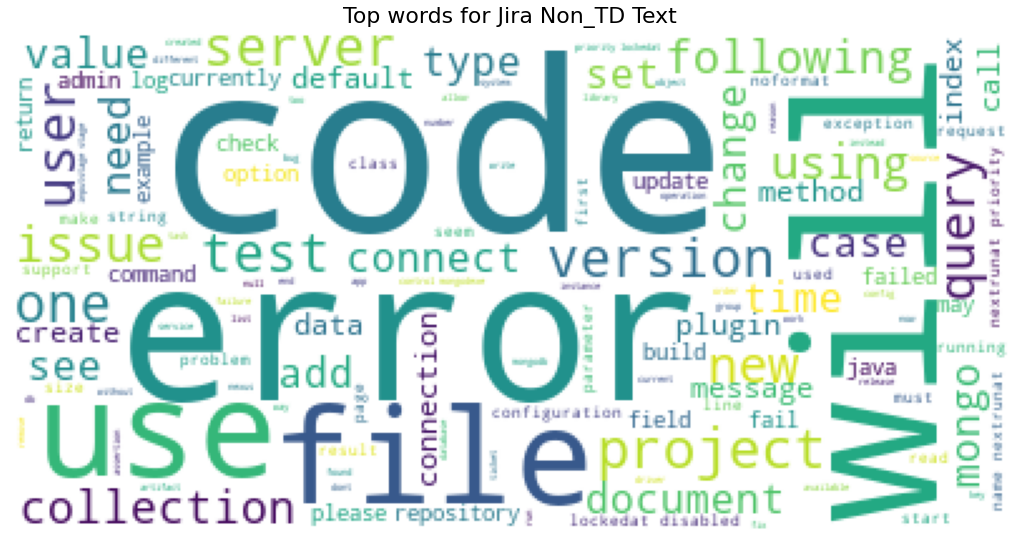

In [15]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in JIRA_df.loc[JIRA_df['label'] == 0, 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira Non_TD Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()


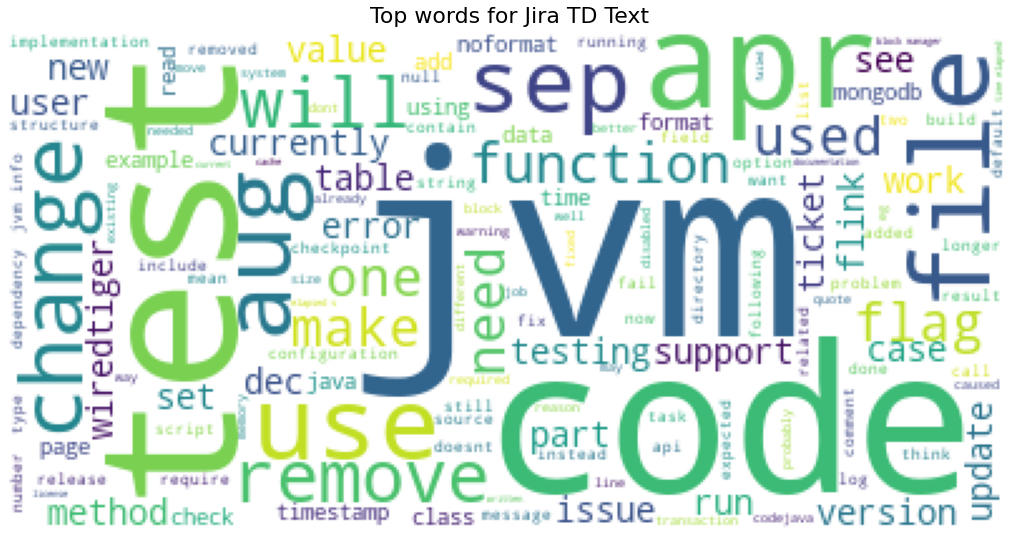

In [16]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in JIRA_df.loc[JIRA_df['label'] == 1, 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira TD Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()


In [17]:
top_debt_words = wc.generate(
    ' '.join(text for text in JIRA_df.loc[JIRA_df['label'] == 1, 'text']))


In [18]:
top_debt_words.words_

{'jvm': 1.0,
 'code': 0.9583333333333334,
 'test': 0.8697916666666666,
 'apr': 0.8541666666666666,
 'file': 0.5364583333333334,
 'use': 0.4791666666666667,
 'aug': 0.40625,
 'sep': 0.3541666666666667,
 'change': 0.3177083333333333,
 'remove': 0.3072916666666667,
 'will': 0.2916666666666667,
 'function': 0.2760416666666667,
 'used': 0.2604166666666667,
 'one': 0.25,
 'flag': 0.24479166666666666,
 'make': 0.23958333333333334,
 'need': 0.23958333333333334,
 'support': 0.234375,
 'update': 0.234375,
 'set': 0.234375,
 'currently': 0.22916666666666666,
 'flink': 0.22916666666666666,
 'testing': 0.21875,
 'run': 0.21875,
 'version': 0.21354166666666666,
 'new': 0.20833333333333334,
 'error': 0.20833333333333334,
 'value': 0.20833333333333334,
 'dec': 0.203125,
 'part': 0.19791666666666666,
 'wiredtiger': 0.19270833333333334,
 'work': 0.1875,
 'see': 0.1875,
 'issue': 0.1875,
 'method': 0.18229166666666666,
 'ticket': 0.18229166666666666,
 'case': 0.18229166666666666,
 'user': 0.1770833333333

In [19]:
JIRA_df['text_len'] = JIRA_df['text'].apply(lambda x: len(x.split(' ')))
JIRA_df.head()


,text,label,text_len
0,this is in kahaimplindexindexmanagerjavathe in...,0,213
1,from execution of there are additional schedu...,1,64
2,the incrbackup test does not appear to test ei...,1,14
3,uniquekeys is a kind of constraint its unreaso...,1,41
4,\r\rthere is no any artifacts,1,5


In [20]:
JIRA_df["text_len"].describe()

count     829.000000
mean       86.260555
std       188.031481
min         1.000000
25%        21.000000
50%        41.000000
75%        82.000000
max      2655.000000
Name: text_len, dtype: float64

In [21]:
balance_counts = JIRA_df.groupby('label')['label'].agg('count').values
balance_counts


array([454, 375], dtype=int64)

In [22]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Non-TD'],
    y=[balance_counts[0]],
    name='Non-TD',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color=primary_blue
))
fig.add_trace(go.Bar(
    x=['TD'],
    y=[balance_counts[1]],
    name='TD',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color=primary_grey
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by label</span>'
)
fig.show()


In [23]:
Non_JIRA_df = JIRA_df[JIRA_df['label'] == 0]['text_len'].value_counts().sort_index()
JIRA_df1 = JIRA_df[JIRA_df['label'] == 1]['text_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=Non_JIRA_df.index,
    y=Non_JIRA_df.values,
    name='Non_TD',
    fill='tozeroy',
    marker_color=primary_blue,
))
fig.add_trace(go.Scatter(
    x=JIRA_df1.index,
    y=JIRA_df1.values,
    name='TD',
    fill='tozeroy',
    marker_color=primary_grey,
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Message length</span>'
)
fig.update_xaxes(range=[0, 300])
fig.show()


In [24]:
from nltk.util import ngrams
from plotly import tools
import plotly.offline as py


In [25]:
#Gram analysis on Training set- Bigram and Trigram
stopword = set(stopwords.words('english'))


def gram_analysis(data, gram):
    tokens = [t for t in data.lower().split(
        " ") if t != "" if t not in stopword]
    ngrams = zip(*[tokens[i:] for i in range(gram)])
    final_tokens = [" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis

def create_dict(data, grams):
    freq_dict = defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence, grams):
            freq_dict[tokens] += 1
    return freq_dict


def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace


def create_new_df(freq_dict,):
    freq_df = pd.DataFrame(sorted(freq_dict.items(), key=lambda z: z[1])[::-1])
    freq_df.columns = ['n_gram_words', 'n_gram_frequency']
   
    trace = horizontal_bar_chart(freq_df[:20], 'orange')
    return trace


def plot_grams(trace_zero, trace_one):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                              subplot_titles=["Frequent words of Non_TD ",
                                              "Frequent words of TD"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900,
                         paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')


In [26]:
JIRA_df_zero = JIRA_df[JIRA_df['label'] == 0]
JIRA_df_ones= JIRA_df[JIRA_df['label'] == 1]

In [27]:
print("Bi-gram analysis")
freq_df_zero=create_dict(JIRA_df_zero["text"],2)

Bi-gram analysis


In [29]:
trace_zero = create_new_df(freq_df_zero)
freq_df_ones = create_dict(JIRA_df_ones["text"], 2)
trace_ones = create_new_df(freq_df_ones)


In [30]:
plot_grams(trace_zero, trace_ones)


c:\Users\karth\anaconda3\envs\test\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [32]:
print("Tri-gram analysis")
freq_df_zero = create_dict(JIRA_df_zero["text"], 3)
trace_zero=create_new_df(freq_df_zero)
freq_df_ones = create_dict(JIRA_df_ones["text"], 3)
trace_ones=create_new_df(freq_df_ones)
plot_grams(trace_zero,trace_ones)

Tri-gram analysis


c:\Users\karth\anaconda3\envs\test\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

